# 준비작업

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive',force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 라이브러리 임포트 

import datetime
import time
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from warnings import simplefilter

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False
from matplotlib.patches import Patch
import seaborn as sns
import statsmodels.api as sm1

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVC as svc

from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer 

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor

from sklearn.pipeline import make_pipeline

from matplotlib.colors import ListedColormap

from matplotlib.ticker import MaxNLocator

from scipy import stats
from scipy.stats import randint, uniform

#from category_encoders import OrdinalEncoder
# pip install --upgrade category_encoders

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import lightgbm as lgb

In [ ]:
# Feature engineering 작업이 완료된 csv파일

dataset = pd.read_csv('/content/gdrive/MyDrive/project/final_featured_dataset_preprocessed_kdy_220606_3.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523098 entries, 0 to 523097
Data columns (total 65 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       523098 non-null  int64  
 1   Date             523098 non-null  object 
 2   Open             523098 non-null  int64  
 3   High             523098 non-null  int64  
 4   Low              523098 non-null  int64  
 5   Close            523098 non-null  int64  
 6   Volume           523098 non-null  float64
 7   signal           523098 non-null  int64  
 8   EMA10            523098 non-null  float64
 9   EMA30            523098 non-null  float64
 10  EMA180           523098 non-null  float64
 11  ROC10            523098 non-null  float64
 12  ROC30            523098 non-null  float64
 13  MOM10            523098 non-null  int64  
 14  MOM30            523098 non-null  int64  
 15  %K10             523098 non-null  float64
 16  %D10             523098 non-null  floa

In [ ]:
dataset

,Unnamed: 0,Date,Open,High,Low,Close,Volume,signal,EMA10,EMA30,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,0,2017100.864,2014596.329,...,25.36670,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,0,2017446.162,2014880.437,...,25.36670,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,0,2017183.223,2014952.667,...,25.36670,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,0,2017513.546,2015213.785,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,0,2017783.811,2015458.057,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523093,523093,22-03-23 15:15,3666000,3667000,3665000,3665000,39.688187,0,3665095.394,3659771.930,...,4.68624,48.670278,0.000013,0.000093,3666000.0,3666000.0,3668000.0,8.164602,25.110129,68.150391
523094,523094,22-03-23 15:16,3666000,3669000,3665000,3668000,76.731647,0,3665078.050,3660109.225,...,4.68624,48.124403,0.000013,0.000091,3665000.0,3666000.0,3666000.0,39.688187,8.164602,25.110129
523095,523095,22-03-23 15:17,3668000,3671000,3667000,3669000,96.039465,0,3665609.313,3660618.307,...,4.68624,49.368770,0.000013,0.000094,3668000.0,3665000.0,3666000.0,76.731647,39.688187,8.164602
523096,523096,22-03-23 15:18,3667000,3674000,3663000,3663000,91.949217,0,3666225.802,3661159.062,...,4.68624,49.889389,0.000014,0.000096,3669000.0,3668000.0,3665000.0,96.039465,76.731647,39.688187


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'signal', 'EMA10', 'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10',
       'MOM30', '%K10', '%D10', '%K30', '%D30', '%K180', '%D180', 'RSI10',
       'RSI30', 'RSI180', 'MA10', 'MA30', 'MA180', 'EMAFast', 'EMASlow',
       'MACD', 'MACDSignal', 'MACDDiff', 'MBB(MA20)', 'HBB', 'LBB', 'PDI',
       'MDI', 'ADX', 'OLCR', 'HCR', 'LCR', 'CLCR', 'VLVR', 'VMA5R', 'VMA10R',
       'VMA20R', 'VMA60R', 'VMA120R', 'BTC_close', 'DXY', 'BTCD',
       'Kimchi_premium', 'S&P500', 'Ethereum DeFi', 'News_freq', 'NaverTrend',
       'Kyle_lambda', 'Amihud_lambda', 'Hasbrouck_labda', 'Close_bf_1mim',
       'Close_bf_2mim', 'Close_bf_3mim', 'Volume_bf_1mim', 'Volume_bf_2mim',
       'Volume_bf_3mim'],
      dtype='object')

In [ ]:
# 필요없는 columns 삭제
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset.head()

,Date,Open,High,Low,Close,Volume,signal,EMA10,EMA30,EMA180,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,0,2017100.864,2014596.329,2022490.830,...,25.3667,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,0,2017446.162,2014880.437,2022452.257,...,25.3667,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,0,2017183.223,2014952.667,2022380.962,...,25.3667,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,0,2017513.546,2015213.785,2022343.603,...,25.3667,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,0,2017783.811,2015458.057,2022306.657,...,25.3667,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452


In [ ]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'signal', 'EMA10',
       'EMA30', 'EMA180', 'ROC10', 'ROC30', 'MOM10', 'MOM30', '%K10', '%D10',
       '%K30', '%D30', '%K180', '%D180', 'RSI10', 'RSI30', 'RSI180', 'MA10',
       'MA30', 'MA180', 'EMAFast', 'EMASlow', 'MACD', 'MACDSignal', 'MACDDiff',
       'MBB(MA20)', 'HBB', 'LBB', 'PDI', 'MDI', 'ADX', 'OLCR', 'HCR', 'LCR',
       'CLCR', 'VLVR', 'VMA5R', 'VMA10R', 'VMA20R', 'VMA60R', 'VMA120R',
       'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
       'News_freq', 'NaverTrend', 'Kyle_lambda', 'Amihud_lambda',
       'Hasbrouck_labda', 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
       'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim'],
      dtype='object')

# 3-2. Data 분리 - train/validation/test

## 3-2-1. Train and Test

In [ ]:
# 훈련 및 테스트 데이터셋 분리

y= dataset["signal"]
X= dataset.loc[:, dataset.columns != 'signal']


'''

## 연산 속도 문제로 전체 데이터셋의 20%만 사용

X_train = X.loc[:80000, :]
X_test = X.loc[80360:100360,:]
y_train = y.loc[:80000]
y_test = y.loc[80360:100360]


'''

## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [ ]:
X_train

,Date,Open,High,Low,Close,Volume,EMA10,EMA30,EMA180,ROC10,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,21-03-23 22:12,2020000,2020000,2019000,2019000,36.582210,2017100.864,2014596.329,2022490.830,0.298063,...,25.36670,30.777662,0.000015,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,21-03-23 22:13,2020000,2020000,2016000,2016000,63.727452,2017446.162,2014880.437,2022452.257,0.198511,...,25.36670,28.991902,0.000014,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,21-03-23 22:14,2018000,2020000,2016000,2019000,17.019108,2017183.223,2014952.667,2022380.962,0.000000,...,25.36670,25.666219,0.000013,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,21-03-23 22:15,2019000,2019000,2018000,2019000,35.570307,2017513.546,2015213.785,2022343.603,0.148810,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,21-03-23 22:16,2019000,2020000,2017000,2018000,45.582501,2017783.811,2015458.057,2022306.657,0.099157,...,25.36670,34.479842,0.000017,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365996,21-12-04 0:13,5333000,5334000,5331000,5331000,40.228077,5327162.050,5340364.370,5352374.664,0.282008,...,4.46573,102.757064,0.000019,0.000181,5334000.0,5331000.0,5320000.0,63.310245,78.323853,77.099640
365997,21-12-04 0:14,5334000,5334000,5330000,5331000,32.560855,5327859.859,5339760.217,5352138.480,0.471165,...,4.46573,103.846928,0.000019,0.000182,5331000.0,5334000.0,5331000.0,40.228077,63.310245,78.323853
365998,21-12-04 0:15,5332000,5332000,5328000,5328000,39.897972,5328430.794,5339195.042,5351904.906,0.244453,...,4.46573,103.846928,0.000019,0.000182,5331000.0,5331000.0,5334000.0,32.560855,40.228077,63.310245
365999,21-12-04 0:16,5330000,5330000,5325000,5326000,27.683435,5328352.468,5338472.781,5351640.763,0.357883,...,4.46573,106.359766,0.000020,0.000183,5328000.0,5331000.0,5331000.0,39.897972,32.560855,40.228077


In [ ]:
X_test

,Date,Open,High,Low,Close,Volume,EMA10,EMA30,EMA180,ROC10,...,NaverTrend,Kyle_lambda,Amihud_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
366501,21-12-04 8:38,5084000,5098000,5081000,5093000,273.994015,5065913.145,5046940.654,5018030.082,0.375049,...,4.46573,30.798162,0.000006,0.000079,5085000.0,5064000.0,5058000.0,262.277662,65.842314,185.846118
366502,21-12-04 8:39,5092000,5099000,5079000,5081000,165.055735,5070838.028,5049912.224,5018858.479,0.315147,...,4.46573,31.531145,0.000006,0.000082,5093000.0,5085000.0,5064000.0,273.994015,262.277662,65.842314
366503,21-12-04 8:40,5086000,5089000,5080000,5084000,133.841917,5072685.659,5051917.887,5019545.126,0.098503,...,4.46573,34.643769,0.000007,0.000090,5081000.0,5093000.0,5085000.0,165.055735,273.994015,262.277662
366504,21-12-04 8:41,5080000,5084000,5064000,5075000,169.469085,5074742.812,5053987.701,5020257.334,0.197083,...,4.46573,34.462813,0.000007,0.000089,5084000.0,5081000.0,5093000.0,133.841917,165.055735,273.994015
366505,21-12-04 8:42,5075000,5084000,5072000,5082000,136.379861,5074789.573,5055343.333,5020862.226,-0.137741,...,4.46573,34.974488,0.000007,0.000093,5075000.0,5084000.0,5081000.0,169.469085,133.841917,165.055735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523093,22-03-23 15:15,3666000,3667000,3665000,3665000,39.688187,3665095.394,3659771.930,3634378.002,0.109230,...,4.68624,48.670278,0.000013,0.000093,3666000.0,3666000.0,3668000.0,8.164602,25.110129,68.150391
523094,22-03-23 15:16,3666000,3669000,3665000,3668000,76.731647,3665078.050,3660109.225,3634716.366,0.027293,...,4.68624,48.124403,0.000013,0.000091,3665000.0,3666000.0,3666000.0,39.688187,8.164602,25.110129
523095,22-03-23 15:17,3668000,3671000,3667000,3669000,96.039465,3665609.313,3660618.307,3635084.141,0.054555,...,4.68624,49.368770,0.000013,0.000094,3668000.0,3665000.0,3666000.0,76.731647,39.688187,8.164602
523096,22-03-23 15:18,3667000,3674000,3663000,3663000,91.949217,3666225.802,3661159.062,3635458.902,0.109141,...,4.68624,49.889389,0.000014,0.000096,3669000.0,3668000.0,3665000.0,96.039465,76.731647,39.688187


In [ ]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
365996   -1
365997   -1
365998   -1
365999   -1
366000   -1
Name: signal, Length: 366001, dtype: int64

In [ ]:
y_test

366501    0
366502    0
366503    0
366504    0
366505    0
         ..
523093    0
523094    0
523095    0
523096    0
523097    0
Name: signal, Length: 156597, dtype: int64

## 3-2-2. Time-Series Cross Validation 정의

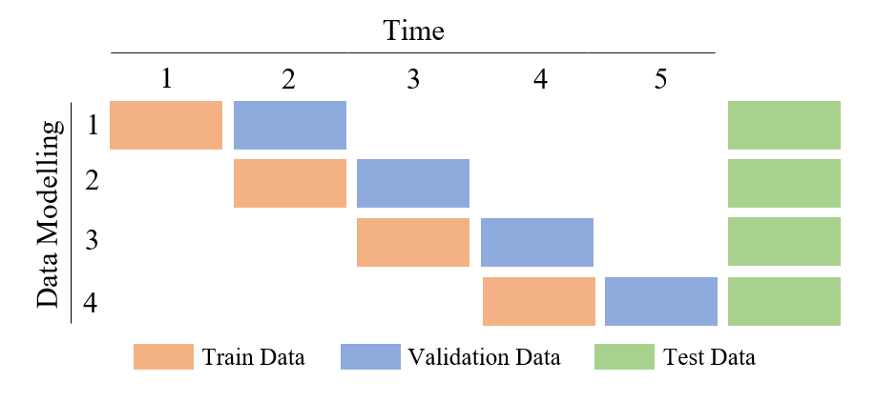

In [ ]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.9 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [ ]:
btss = BlockingTimeSeriesSplit(n_splits=5)

In [ ]:
sc = StandardScaler()
f1_score = make_scorer(f1_score , average='macro')

# 3-3. Learning models

## 3-3-1. LightGBM

### 3-3-1-1. Selecting Features

In [ ]:
## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366001 entries, 0 to 366000
Data columns (total 63 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             366001 non-null  object 
 1   Open             366001 non-null  int64  
 2   High             366001 non-null  int64  
 3   Low              366001 non-null  int64  
 4   Close            366001 non-null  int64  
 5   Volume           366001 non-null  float64
 6   EMA10            366001 non-null  float64
 7   EMA30            366001 non-null  float64
 8   EMA180           366001 non-null  float64
 9   ROC10            366001 non-null  float64
 10  ROC30            366001 non-null  float64
 11  MOM10            366001 non-null  int64  
 12  MOM30            366001 non-null  int64  
 13  %K10             366001 non-null  float64
 14  %D10             366001 non-null  float64
 15  %K30             366001 non-null  float64
 16  %D30             366001 non-null  floa

In [ ]:
'''
      Feature Selection(LGBM)을 통해서 선정한 14개의 Features
      1분,2분,3분전의 종가와 거래량 6개의 Features 
      총 20개의 Features 선정
      
      "X_train, X_test" 저장

'''

#1. LightGBM

X_train = X_train[['ROC10','ROC30','%K180','RSI30','RSI180','MACD','PDI','MDI','ADX','OLCR','HCR','LCR','VLVR','VMA10R','VMA60R','BTC_close','DXY','BTCD','Kimchi_premium','S&P500','Ethereum DeFi','News_freq','NaverTrend','Kyle_lambda','Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
                                     
X_test = X_test[['ROC10','ROC30','%K180','RSI30','RSI180','MACD','PDI','MDI','ADX','OLCR','HCR','LCR','VLVR','VMA10R','VMA60R','BTC_close','DXY','BTCD','Kimchi_premium','S&P500','Ethereum DeFi','News_freq','NaverTrend','Kyle_lambda','Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

### 3-3-1-2. Random Search and Blocking Time Series Split

In [ ]:
lgbm_clf = lgb.LGBMClassifier()
pipe_lgbm = Pipeline([('scaler', sc), ('lgbm',lgbm_clf)])

In [ ]:
params = {'lgbm__n_estimators': randint(10,500),      # 트리갯수, 너무 크면 overfitting
          'lgbm__max_depth': [5, 10, 15, 20, None],   # 최대 깊이
          'lgbm__num_leaves': [50, 100, 200],         # 하나의 tree가 가지는 최대 leaf수
          'lgbm__reg_alpha': [1.1, 1.2, 1.3],         # L1 Reg.적용 값. feature갯수 많을때 적용 고려. 클수록 ovefitting 가능성 감소 효과
          'lgbm__reg_lambda': [1.1, 1.2, 1.3],        # L2 Reg.적용 값. feature갯수 많을때 적용 고려. 클수록 ovefitting 가능성 감소 효과
          'lgbm__min_split_gain': [0.3, 0.4],         # (default=0.) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
          'lgbm__subsample': [0.7, 0.8, 0.9],
          'lgbm__subsample_freq': [20]
          }

In [ ]:
lgbm_rand_search = RandomizedSearchCV(estimator = pipe_lgbm,
                                      param_distributions = params,
                                      cv = btss, scoring = 'f1_macro')

In [ ]:
lgbm_rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x7f4d29029810>,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('lgbm', LGBMClassifier())]),
                   param_distributions={'lgbm__max_depth': [5, 10, 15, 20,
                                                            None],
                                        'lgbm__min_split_gain': [0.3, 0.4],
                                        'lgbm__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4d28a5f510>,
                                        'lgbm__num_leaves': [50, 100, 200],
                                        'lgbm__reg_alpha': [1.1, 1.2, 1.3],
                                        'lgbm__reg_lambda': [1.1, 1.2, 1.3],
                                        'lgbm__subsample': [0.7, 0.8, 0.9],
                                        'lgbm__subsample_freq': [20]},
                   scoring='f1_macro')

In [ ]:
lgbm_rand_search.best_params_

{'lgbm__max_depth': 20,
 'lgbm__min_split_gain': 0.4,
 'lgbm__n_estimators': 100,
 'lgbm__num_leaves': 200,
 'lgbm__reg_alpha': 1.3,
 'lgbm__reg_lambda': 1.1,
 'lgbm__subsample': 0.7,
 'lgbm__subsample_freq': 20}

In [ ]:
print (f'Train Accuracy LGBM : {lgbm_rand_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy LGBM : {lgbm_rand_search.score(X_test,y_test):.3f}')

Train Accuracy LGBM : 0.924
Test Accuracy LGBM : 0.400


### 3-3-1-3. 최적의 hyperparameters로 학습하기

In [ ]:
lgbm_clf = lgb.LGBMClassifier(max_depth=15,     # default
                              min_split_gain=0.4,
                              n_estimators=444,
                              num_leaves=200,
                              reg_alpha=1.2,
                              reg_lambda=1.1,
                              subsample=0.7,
                              subsample_freq=20,
                              scoring= 'f1_macro')

In [ ]:
## Model fitting

lgbm_clf.fit(X_train,y_train)

LGBMClassifier(max_depth=15, min_split_gain=0.4, n_estimators=444,
               num_leaves=200, reg_alpha=1.2, reg_lambda=1.1,
               scoring='f1_macro', subsample=0.7, subsample_freq=20)

In [ ]:
## Prediction

y_pred_lgbm = lgbm_clf.predict(X_test)

### 3-3-1-4. 평가(Evaluation)

In [ ]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred_lgbm, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,0.489241,0.397583,0.438675,54439.000000
Stay,0.332429,0.176173,0.230298,50053.000000
Up Day,0.392853,0.647136,0.488908,52105.000000
accuracy,0.409848,0.409848,0.409848,0.409848
macro avg,0.404841,0.406964,0.385960,156597.000000
weighted avg,0.407048,0.409848,0.388786,156597.000000


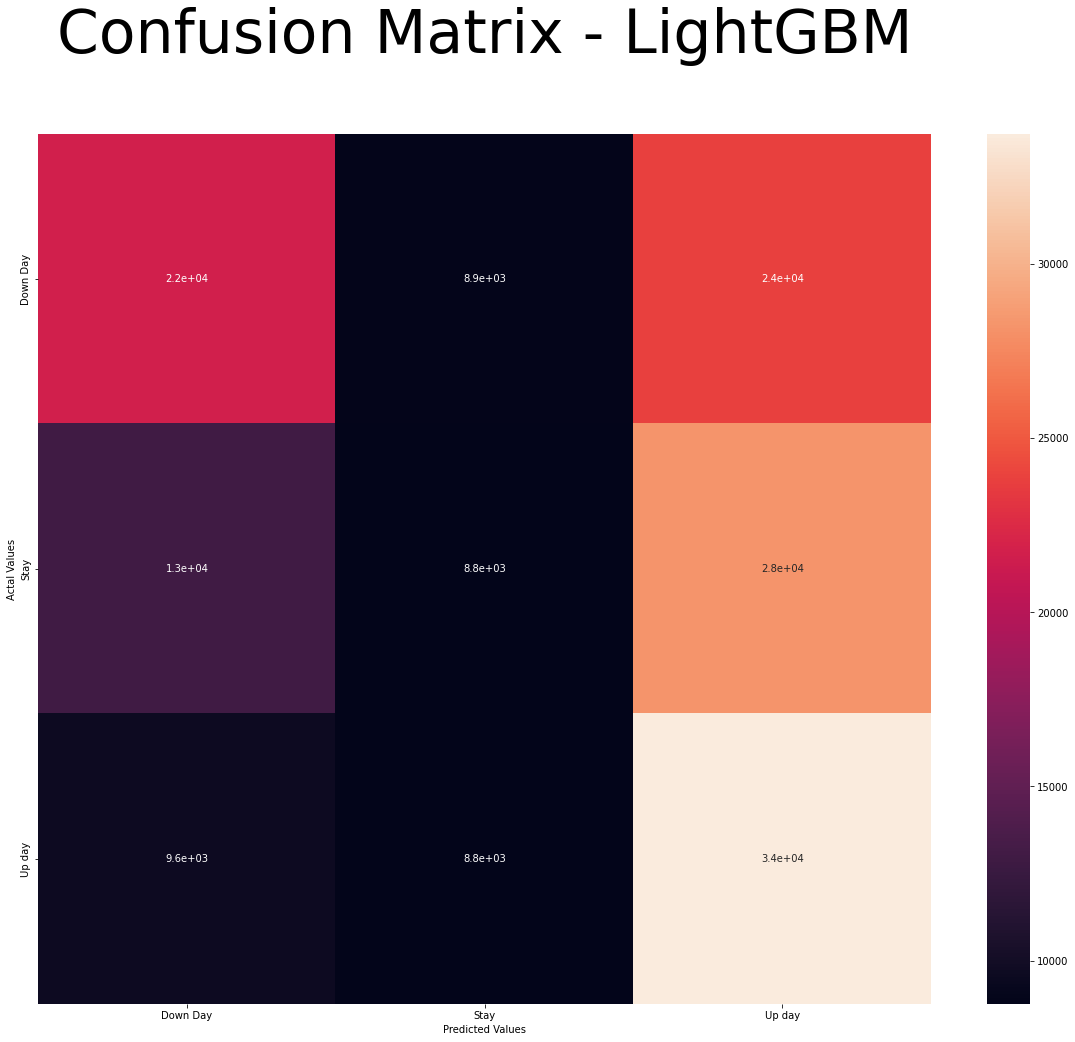

In [ ]:
'''
    Confusion Matrix
'''

lgbm_matrix = confusion_matrix(y_test, y_pred_lgbm)
lgbm_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
lgbm_matrix_df = pd.DataFrame(lgbm_matrix,
                            index = ['Down Day','Stay','Up day'], 
                            columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(lgbm_matrix_df, annot=True)
plt.rc('font', size=50) 
plt.title('Confusion Matrix - LightGBM\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3
#y_score_lgbm = lgbm_clf.predict_proba(X_test)

y_prob_lgbm = lgbm_clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_lgbm, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.593207 (macro),
0.593977 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.593847 (macro),
0.595690 (weighted by prevalence)


In [ ]:
'''
    Feature Importance

      Ensemble Learning의 경우 중요 Feature를 추출할 수 있는 알고리즘이 내장되어 있음
      Feature importance 측정 기준: weight, cover, gain 등
     
'''

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(lgbm_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

BTCD               28686
Kimchi_premium     25750
DXY                21704
BTC_close          19157
Ethereum DeFi      12424
News_freq          11248
RSI180             10773
Kyle_lambda        10413
S&P500             10069
NaverTrend          9538
Close_bf_1mim       8624
Hasbrouck_labda     6373
Close_bf_3mim       5959
%K180               5096
Close_bf_2mim       4983
MACD                4956
ADX                 2833
RSI30               2792
ROC30               2325
MDI                 2138
PDI                 1533
ROC10               1265
Volume_bf_3mim       910
Volume_bf_1mim       842
VMA60R               788
Volume_bf_2mim       775
LCR                  541
VMA10R               483
VLVR                 418
HCR                  400
OLCR                 352
dtype: int64

### 3-3-1-4. 학습결과 저장(백테스팅용)

In [ ]:
# 학습모델이 예측한 Label

lgbm_predicted_label = pd.DataFrame({'LGBM_Predicted_label':y_pred_lgbm})
lgbm_predicted_label

,LGBM_Predicted_label
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
156592,1
156593,1
156594,1
156595,1


In [ ]:
# 학습모델이 예측한 각 Labels의 예측확률

y_prob_lgbm = lgbm_clf.predict_proba(X_test)
y_prob_lgbm

array([[0.56785324, 0.26308642, 0.16906034],
       [0.60186705, 0.24180827, 0.15632469],
       [0.51365286, 0.27742319, 0.20892395],
       ...,
       [0.02008847, 0.05736382, 0.92254771],
       [0.0211522 , 0.09596126, 0.88288653],
       [0.02479059, 0.12564306, 0.84956634]])

In [ ]:
column_names = ['LGBM_Down Day','LGBM_Stay','LGBM_Up day']

lgbm_pred_prob = pd.DataFrame(y_prob_lgbm, columns=column_names)

In [ ]:
lgbm_pred_prob

,LGBM_Down Day,LGBM_Stay,LGBM_Up day
0,0.567853,0.263086,0.169060
1,0.601867,0.241808,0.156325
2,0.513653,0.277423,0.208924
3,0.542499,0.305488,0.152013
4,0.625694,0.198561,0.175744
...,...,...,...
156592,0.020149,0.082911,0.896940
156593,0.025894,0.073372,0.900734
156594,0.020088,0.057364,0.922548
156595,0.021152,0.095961,0.882887


In [ ]:
# 예측 labels과 예측 확률 합치기

lgbm_pred_prob_total = pd.merge(lgbm_predicted_label, lgbm_pred_prob, left_index=True, right_index=True)
lgbm_pred_prob_total

,LGBM_Predicted_label,LGBM_Down Day,LGBM_Stay,LGBM_Up day
0,-1,0.567853,0.263086,0.169060
1,-1,0.601867,0.241808,0.156325
2,-1,0.513653,0.277423,0.208924
3,-1,0.542499,0.305488,0.152013
4,-1,0.625694,0.198561,0.175744
...,...,...,...,...
156592,1,0.020149,0.082911,0.896940
156593,1,0.025894,0.073372,0.900734
156594,1,0.020088,0.057364,0.922548
156595,1,0.021152,0.095961,0.882887


In [ ]:
# csv 파일 출력

lgbm_pred_prob_total.to_csv('/content/gdrive/MyDrive/project/lgbm_pred_prob_total_220607.csv')

In [ ]:
## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [ ]:
X_train.shape

(366001, 63)

In [ ]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
365996   -1
365997   -1
365998   -1
365999   -1
366000   -1
Name: signal, Length: 366001, dtype: int64

In [ ]:
'''
      Feature Selection(LGBM)을 통해서 선정한 14개의 Features
      1분,2분,3분전의 종가와 거래량 6개의 Features 
      총 20개의 Features 선정
      
      "X_train, X_test" 저장

'''

#1. LightGBM

X_train = X_train[['%K30', '%K180',  'RSI30', 'RSI180', 
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
                                     
X_test = X_test[['%K30', '%K180',  'RSI30', 'RSI180', 
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

## 3-3-2. Random Forest

### 3-3-2-1. Selecting Features

In [ ]:
## Data 100% 사용 


# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [ ]:
'''
      Feature Selection(Random Forest)을 통해서 선정한 13개의 Features
      1분,2분,3분전의 종가와 거래량 6개의 Features 
      총 19개의 Features 선정
      
      "X_train, X_test" 저장

'''

# 2. Random Forest (새로운 FEATURE SELECTION)

X_train = X_train[['EMA10','%D10','%K180','RSI180','MACDDiff','PDI','MDI',
                   'ADX','OLCR','HCR','LCR','CLCR','VMA5R','VMA10R','VMA60R',
                   'BTC_close','DXY','BTCD','Kimchi_premium','S&P500',
                   'Ethereum DeFi','News_freq','NaverTrend','Kyle_lambda',
                   'Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
                                     
X_test = X_test[['EMA10','%D10','%K180','RSI180','MACDDiff','PDI','MDI',
                 'ADX','OLCR','HCR','LCR','CLCR','VMA5R','VMA10R','VMA60R',
                 'BTC_close','DXY','BTCD','Kimchi_premium','S&P500',
                 'Ethereum DeFi','News_freq','NaverTrend','Kyle_lambda',
                 'Hasbrouck_labda',
                 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                 'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]


'''
#2 . Random Forest(구 FEATURE SELECTION)

X_train = X_train[['RSI30', 'RSI180', 'MACD', 'OLCR', 'BTC_close',
                   'DXY', 'BTCD', 'Kimchi_premium', 'S&P500',
                   'Ethereum DeFi', 'News_freq', 'NaverTrend', 'Kyle_lambda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
                                     
X_test = X_test[['RSI30', 'RSI180', 'MACD', 'OLCR', 'BTC_close',
                 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500',
                 'Ethereum DeFi', 'News_freq', 'NaverTrend', 'Kyle_lambda',
                 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                 'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
'''

"\n#2 . Random Forest(구 FEATURE SELECTION)\n\nX_train = X_train[['RSI30', 'RSI180', 'MACD', 'OLCR', 'BTC_close',\n                   'DXY', 'BTCD', 'Kimchi_premium', 'S&P500',\n                   'Ethereum DeFi', 'News_freq', 'NaverTrend', 'Kyle_lambda',\n                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',\n                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]\n                                     \nX_test = X_test[['RSI30', 'RSI180', 'MACD', 'OLCR', 'BTC_close',\n                 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500',\n                 'Ethereum DeFi', 'News_freq', 'NaverTrend', 'Kyle_lambda',\n                 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',\n                 'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]\n"

### 3-3-3-2. Random Search and Blocking Time Series Split

In [ ]:
rf_clf = RandomForestClassifier('n_jobs=-1')

In [ ]:
rf_params = {'n_estimators': randint(10,500),
            'max_features':  ['auto', 'sqrt'],
            'max_depth': [5, 15, 20, 25, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'criterion': ['gini','entropy'],
            'bootstrap': [True, False]}

In [ ]:
rf_rand_search = RandomizedSearchCV(estimator = rf_clf,
                                    pre_dispatch='2*n_jobs=-1',
                                    param_distributions = rf_params,
                                    cv = btss, 
                                    scoring = 'f1_macro')

In [ ]:
# Feature Scaling

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



'''

#내가 하다 오류난거. pipeline 활용

pipe_rf = Pipeline([('scaler', sc), ('rf', rf_clf)])
pipe_rf = make_pipeline(sc, rf_clf)

------------------------------------------------------

장봉준님 코드

scaler = sc.fit(X_train)
X_scaled= scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
X_test_sclaer= scaler.transform(X_test)
'''

"\n\n#내가 하다 오류난거. pipeline 활용\n\npipe_rf = Pipeline([('scaler', sc), ('rf', rf_clf)])\npipe_rf = make_pipeline(sc, rf_clf)\n\n\n장봉준님 코드\n\nscaler = sc.fit(X_train)\nX_scaled= scaler.transform(X_train)\nscaler = StandardScaler().fit(X_test)\nX_test_sclaer= scaler.transform(X_test)\n"

In [ ]:
rf_rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x7f20df583150>,
                   estimator=RandomForestClassifier(n_estimators='n_jobs=-1'),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 15, 20, 25, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f20c73856d0>},
                   pre_dispatch='2*n_jobs=-1', scoring='f1_macro')

In [ ]:
rf_rand_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 455}

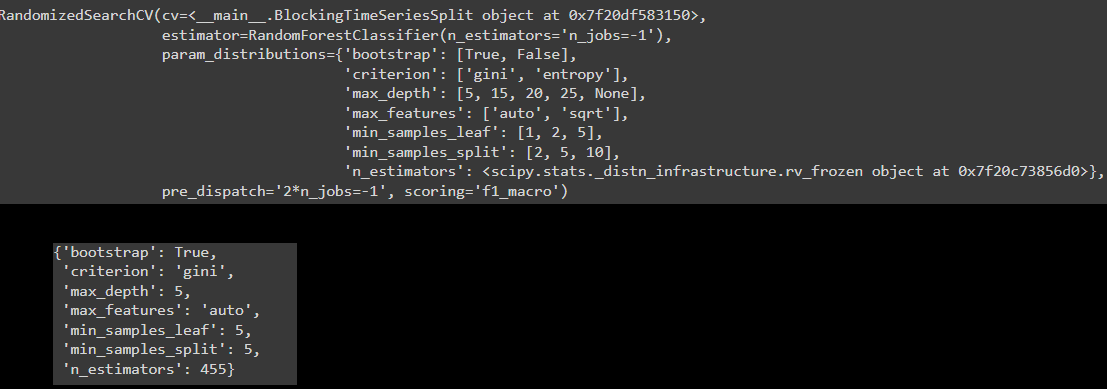

In [ ]:
print (f'Train Accuracy RF : {rf_rand_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy RF : {rf_rand_search.score(X_test,y_test):.3f}')

Train Accuracy RF : 0.425
Test Accuracy RF : 0.389


### 3-3-2-3. 최적의 hyperparameters로 학습하기

In [ ]:
rf_clf = RandomForestClassifier(bootstrap=True,
                                criterion='gini',
                                max_depth=5,
                                max_features='auto',
                                min_samples_leaf=5,
                                min_samples_split=5,
                                n_estimators=455)


'''
rf_clf = RandomForestClassifier(bootstrap=False,
                                criterion='entropy',
                                max_depth=10,
                                max_features='auto',
                                min_samples_leaf=1,
                                min_samples_split=2,
                                n_estimators=16)
                                
'''
#n_estimators : 모델에서 사용할 트리 갯수(학습시 생성할 트리 갯수)
#criterion : 분할 품질을 측정하는 기능 (default : gini)
#max_depth : 트리의 최대 깊이
#min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
#min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
#min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
#max_features : 각 노드에서 분할에 사용할 특징의 최대 수
#max_leaf_nodes : 리프 노드의 최대수
#min_impurity_decrease : 최소 불순도
#min_impurity_split : 나무 성장을 멈추기 위한 임계치
#bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
#oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
#n_jobs :적합성과 예측성을 위해 병렬로 실행할 작업 수
#random_state : 난수 seed 설정
#verbose : 실행 과정 출력 여부
#warm_start : 이전 호출의 솔루션을 재사용하여 합계에 더 많은 견적가를 추가
#class_weight : 클래스 가중치

"\nrf_clf = RandomForestClassifier(bootstrap=False,\n                                criterion='entropy',\n                                max_depth=10,\n                                max_features='auto',\n                                min_samples_leaf=1,\n                                min_samples_split=2,\n                                n_estimators=16)\n                                \n"

In [ ]:
## Model fitting

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=455)

In [ ]:
## 예측값 저장

y_pred_rf = rf_clf.predict(X_test)

### 3-3-2-3. 평가(Evaluation)

In [ ]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred_rf, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
rf_report_df = pd.DataFrame(report).transpose()
rf_report_df

,precision,recall,f1-score,support
Down Day,0.519507,0.598780,0.556334,54439.000000
Stay,0.382553,0.019100,0.036383,50053.000000
Up Day,0.434769,0.762249,0.553713,52105.000000
accuracy,0.467889,0.467889,0.467889,0.467889
macro avg,0.445610,0.460043,0.382143,156597.000000
weighted avg,0.447537,0.467889,0.389270,156597.000000


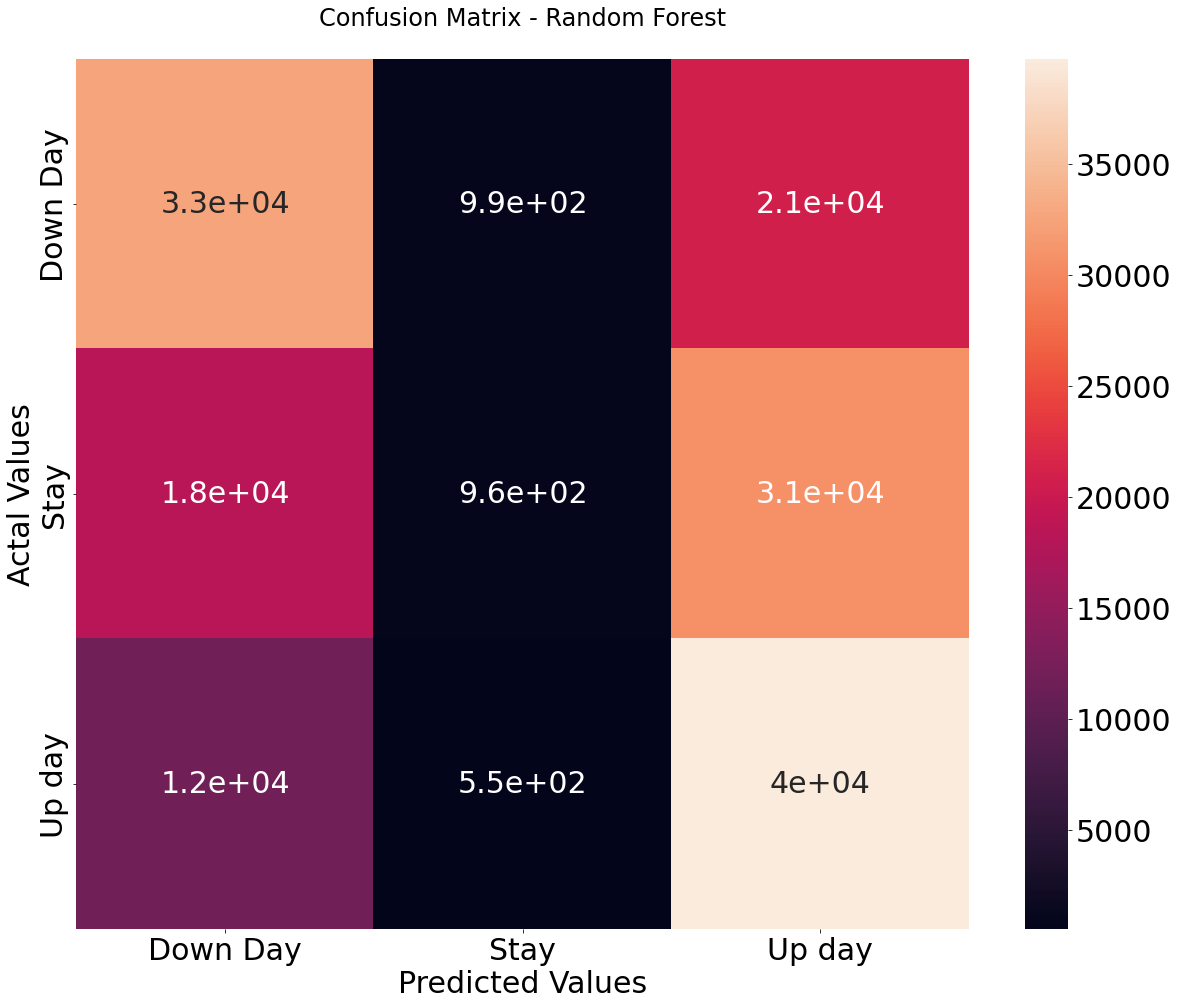

In [ ]:
'''
    Confusion Matrix
'''

rf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
rf_matrix_df = pd.DataFrame(rf_matrix,
                              index = ['Down Day','Stay','Up day'], 
                              columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(rf_matrix_df, annot=True)
plt.rc('font', size=20) 
plt.title('Confusion Matrix - Random Forest\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3

y_prob_rf = rf_clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_rf, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_rf, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_rf, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_rf, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.649321 (macro),
0.650332 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.650206 (macro),
0.652541 (weighted by prevalence)


In [ ]:
'''
    Feature Importance

      Ensemble Learning의 경우 중요 Feature를 추출할 수 있는 알고리즘이 내장되어 있음
      Feature importance 측정 기준: weight, cover, gain 등
     
'''
X_train_columns = X.loc[:366000, :]

X_train_columns = X_train_columns[['EMA10','%D10','%K180','RSI180','MACDDiff','PDI','MDI',
                   'ADX','OLCR','HCR','LCR','CLCR','VMA5R','VMA10R','VMA60R',
                   'BTC_close','DXY','BTCD','Kimchi_premium','S&P500',
                   'Ethereum DeFi','News_freq','NaverTrend','Kyle_lambda',
                   'Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rf_clf.feature_importances_, index=X_train_columns.columns).sort_values(ascending=False)
feature_imp

%K180              3.719250e-01
RSI180             3.153098e-01
BTCD               6.118386e-02
Ethereum DeFi      3.406988e-02
Kimchi_premium     2.536204e-02
BTC_close          2.288609e-02
S&P500             1.915616e-02
DXY                1.773004e-02
News_freq          1.645930e-02
NaverTrend         1.588349e-02
EMA10              1.407528e-02
PDI                1.320429e-02
Close_bf_1mim      1.081141e-02
Close_bf_2mim      1.023940e-02
%D10               9.753053e-03
Close_bf_3mim      9.092390e-03
Kyle_lambda        6.382360e-03
MDI                6.132560e-03
Volume_bf_1mim     4.473216e-03
Volume_bf_3mim     4.371901e-03
Volume_bf_2mim     3.959022e-03
VMA60R             1.999410e-03
MACDDiff           1.680430e-03
ADX                1.617219e-03
Hasbrouck_labda    1.535736e-03
HCR                5.437246e-04
CLCR               7.515360e-05
LCR                5.905290e-05
VMA5R              1.722658e-05
VMA10R             1.061644e-05
OLCR               9.283064e-07
dtype: f

### 3-3-2-4. 학습결과 저장(백테스팅용)

In [ ]:
# 학습모델이 예측한 Label

rf_predicted_label = pd.DataFrame({'RF_Predicted_label':y_pred_rf})
rf_predicted_label

,RF_Predicted_label
0,1
1,1
2,1
3,1
4,1
...,...
156592,1
156593,1
156594,1
156595,1


In [ ]:
y_prob_rf = rf_clf.predict_proba(X_test)
y_prob_rf

array([[0.20906389, 0.29153965, 0.49939646],
       [0.20284973, 0.28819854, 0.50895173],
       [0.20722268, 0.28917865, 0.50359867],
       ...,
       [0.13689048, 0.2386175 , 0.62449202],
       [0.13394932, 0.2360374 , 0.63001328],
       [0.14228731, 0.24384468, 0.61386801]])

In [ ]:
column_names = ['RF_Down Day','RF_Stay','RF_Up day']

rf_pred_prob = pd.DataFrame(y_prob_rf, columns=column_names)

In [ ]:
rf_pred_prob

,RF_Down Day,RF_Stay,RF_Up day
0,0.209064,0.291540,0.499396
1,0.202850,0.288199,0.508952
2,0.207223,0.289179,0.503599
3,0.206367,0.289498,0.504135
4,0.211979,0.296581,0.491441
...,...,...,...
156592,0.143153,0.245674,0.611173
156593,0.149156,0.249544,0.601300
156594,0.136890,0.238618,0.624492
156595,0.133949,0.236037,0.630013


In [ ]:
# Predictied labels과 Prediction probabilities를 합치기

rf_pred_prob_total = pd.merge(rf_predicted_label, rf_pred_prob, left_index=True, right_index=True)
rf_pred_prob_total

,RF_Predicted_label,RF_Down Day,RF_Stay,RF_Up day
0,1,0.209064,0.291540,0.499396
1,1,0.202850,0.288199,0.508952
2,1,0.207223,0.289179,0.503599
3,1,0.206367,0.289498,0.504135
4,1,0.211979,0.296581,0.491441
...,...,...,...,...
156592,1,0.143153,0.245674,0.611173
156593,1,0.149156,0.249544,0.601300
156594,1,0.136890,0.238618,0.624492
156595,1,0.133949,0.236037,0.630013


In [ ]:
# csv 파일 출력

rf_pred_prob_total.to_csv('/content/gdrive/MyDrive/project/rf_pred_prob_220607_2.csv')

## 3-3-4. SVM

In [ ]:

# 훈련용 data - 전체 앞시간 10만분
# 학습이 엄청 오래걸림.

X_train = X.loc[:100000, :]
y_train = y.loc[:100000]


'''
## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]
'''

'\n## Data 100% 사용 \n\n# 훈련용 data - 전체 앞시간 70%\nX_train = X.loc[:366000, :]\ny_train = y.loc[:366000]\n\n# 시험용 data - 전체 뒷시간 약 30%\n#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)\n\nX_test = X.loc[366501:, :]\ny_test = y.loc[366501:]\n'

In [ ]:
'''
      Feature Selection(LGBM)을 통해서 선정한 14개의 Features
      1분,2분,3분전의 종가와 거래량 6개의 Features 
      총 20개의 Features 선정
      
      "X_train, X_test" 저장

'''

# 4. SVM

X_train = X_train[['%K30', '%K180',  'RSI30', 'RSI180', 
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                   'News_freq', 'NaverTrend', 'Kyle_lambda', 'Hasbrouck_labda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
                                     
X_test = X_test[['%K30', '%K180',  'RSI30', 'RSI180', 
                 'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500', 'Ethereum DeFi',
                 'News_freq', 'NaverTrend', 'Kyle_lambda', 'Hasbrouck_labda',
                 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                 'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]

In [ ]:
X_train

,%K30,%K180,RSI30,RSI180,BTC_close,DXY,BTCD,Kimchi_premium,S&P500,Ethereum DeFi,News_freq,NaverTrend,Kyle_lambda,Hasbrouck_labda,Close_bf_1mim,Close_bf_2mim,Close_bf_3mim,Volume_bf_1mim,Volume_bf_2mim,Volume_bf_3mim
0,86.666667,34.090909,56.626435,48.879802,66012000,92.350,61.201411,10.897713,3910.51,4.492662e+10,142,25.36670,30.777662,0.000064,2019000.0,2019000.0,2018000.0,17.313993,20.106467,101.666675
1,86.666667,34.090909,56.626435,48.879802,66015000,92.350,61.201411,10.897713,3910.51,4.492662e+10,142,25.36670,28.991902,0.000059,2019000.0,2019000.0,2019000.0,36.582210,17.313993,20.106467
2,66.666667,27.272727,51.083919,48.290254,65986000,92.350,61.201411,10.897713,3910.51,4.492662e+10,142,25.36670,25.666219,0.000060,2016000.0,2019000.0,2019000.0,63.727452,36.582210,17.313993
3,86.666667,34.090909,55.581462,48.909904,66056000,92.350,61.201411,10.897713,3910.51,4.492662e+10,142,25.36670,34.479842,0.000078,2019000.0,2016000.0,2019000.0,17.019108,63.727452,36.582210
4,86.666667,34.090909,55.581462,48.909904,66000000,92.350,61.201411,10.897713,3910.51,4.492662e+10,142,25.36670,34.479842,0.000078,2019000.0,2019000.0,2016000.0,35.570307,17.019108,63.727452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,35.897436,15.151515,49.805611,48.664187,43117000,89.755,42.920716,5.517170,4208.49,7.633471e+10,179,17.36192,60.696300,0.000120,3057000.0,3063000.0,3062000.0,32.802524,32.118430,61.136169
99997,41.025641,16.666667,50.675271,48.794824,43155000,89.755,42.920716,5.517170,4208.49,7.633471e+10,179,17.36192,67.677436,0.000126,3059000.0,3057000.0,3063000.0,13.036792,32.802524,32.118430
99998,28.205128,12.878788,48.501984,48.484648,43153000,89.755,42.920716,5.517170,4208.49,7.633471e+10,179,17.36192,83.872986,0.000146,3054000.0,3059000.0,3057000.0,14.986319,13.036792,32.802524
99999,17.948718,9.848485,46.839541,48.237968,43125000,89.755,42.920716,5.517170,4208.49,7.633471e+10,179,17.36192,83.092083,0.000146,3050000.0,3054000.0,3059000.0,79.866621,14.986319,13.036792


In [ ]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
99996    -1
99997    -1
99998    -1
99999    -1
100000   -1
Name: signal, Length: 100001, dtype: int64

### 3-3-4-1. Random Search

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC())

In [ ]:
param_range = [0.01, 0.1, 1.0, 10.0]

In [ ]:
params = [{'svc__C': param_range,
           'svc__gamma': param_range}] 

In [ ]:
svm_rand_search = RandomizedSearchCV(estimator = pipe_svc,
                                     param_distributions = params,
                                     cv=btss,
                                     scoring='f1_macro')

In [ ]:
svm_rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x7f6824f6d8d0>,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC())]),
                   param_distributions=[{'svc__C': [0.01, 0.1, 1.0, 10.0],
                                         'svc__gamma': [0.01, 0.1, 1.0, 10.0]}],
                   scoring='f1_macro')

In [ ]:
svm_rand_search.best_params_

In [ ]:
print (f'Train Accuracy SVM : {svm_rand_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy SVM : {svm_rand_search.score(X_test,y_test):.3f}')

### 3-3-3-2. 최적의 하이퍼패러미타를 적용한 모델링 학습

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC(C=0.1, gamma=0.01, probability=True))

In [ ]:
pipe_svc_clf = pipe_svc

In [ ]:
## Model fitting

pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, gamma=0.01, probability=True))])

In [ ]:
## Prediction

y_pred_svc = pipe_svc.predict(X_test)

### 3-3-3-3. 평가(Evaluation)

In [ ]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
svc_report = classification_report(y_true = y_test, y_pred = y_pred_svc, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
svc_report_df = pd.DataFrame(svc_report).transpose()
svc_report_df

,precision,recall,f1-score,support
Down Day,0.791506,0.003766,0.007496,54439.000000
Stay,0.348967,0.008771,0.017111,50053.000000
Up Day,0.333970,0.993993,0.499959,52105.000000
accuracy,0.334847,0.334847,0.334847,0.334847
macro avg,0.491481,0.335510,0.174855,156597.000000
weighted avg,0.497820,0.334847,0.174428,156597.000000


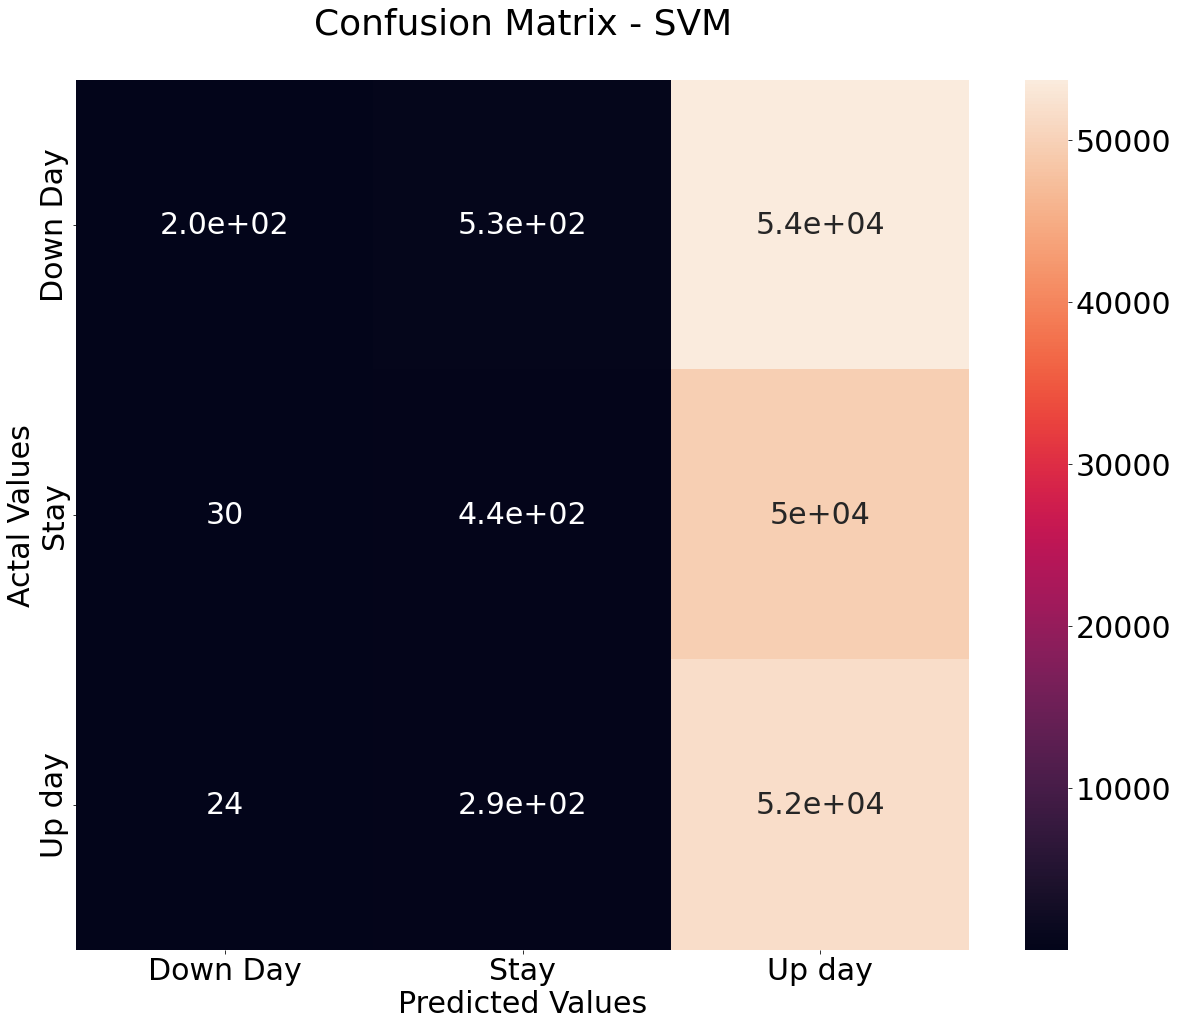

In [ ]:
'''
    Confusion Matrix
'''

svc_matrix = confusion_matrix(y_test, y_pred_svc)
svc_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
svc_matrix_df = pd.DataFrame(svc_matrix,
                            index = ['Down Day','Stay','Up day'], 
                            columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(svc_matrix_df, annot=True)
plt.rc('font', size=30) 
plt.title('Confusion Matrix - SVM\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3

y_prob_svc = pipe_svc.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_svc, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_svc, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_svc, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_svc, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.602316 (macro),
0.603032 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.602673 (macro),
0.604900 (weighted by prevalence)


### 3-3-4-4. 학습결과 저장(백테스팅용)

In [ ]:
# 학습모델이 예측한 Label

svc_predicted_label = pd.DataFrame({'SVM_Predicted_label':y_pred_svc})
svc_predicted_label

,SVM_Predicted_label
0,1
1,1
2,1
3,1
4,1
...,...
156592,1
156593,1
156594,1
156595,1


In [ ]:
# 학습모델이 예측한 각 Labels의 예측확률

#y_prob_svc = pipe_svc.predict_proba(X_test)
y_prob_svc

array([[0.02584912, 0.12278995, 0.85136093],
       [0.02561857, 0.12173337, 0.85264806],
       [0.02434088, 0.11492222, 0.8607369 ],
       ...,
       [0.03621673, 0.15810671, 0.80567656],
       [0.03718461, 0.16001788, 0.80279751],
       [0.03298661, 0.14876223, 0.81825117]])

In [ ]:
column_names = ['SVM_Down Day','SVM_Stay','SVM_Up day']

svc_pred_prob = pd.DataFrame(y_prob_svc, columns=column_names)

In [ ]:
svc_pred_prob

,SVM_Down Day,SVM_Stay,SVM_Up day
0,0.025849,0.122790,0.851361
1,0.025619,0.121733,0.852648
2,0.024341,0.114922,0.860737
3,0.023574,0.116065,0.860361
4,0.021660,0.111149,0.867192
...,...,...,...
156592,0.034835,0.154669,0.810496
156593,0.034082,0.152615,0.813302
156594,0.036217,0.158107,0.805677
156595,0.037185,0.160018,0.802798


In [ ]:
# 예측 labels과 예측 확률 합치기

svc_pred_prob_total = pd.merge(svc_predicted_label, svc_pred_prob, left_index=True, right_index=True)
svc_pred_prob_total

,SVM_Predicted_label,SVM_Down Day,SVM_Stay,SVM_Up day
0,1,0.025849,0.122790,0.851361
1,1,0.025619,0.121733,0.852648
2,1,0.024341,0.114922,0.860737
3,1,0.023574,0.116065,0.860361
4,1,0.021660,0.111149,0.867192
...,...,...,...,...
156592,1,0.034835,0.154669,0.810496
156593,1,0.034082,0.152615,0.813302
156594,1,0.036217,0.158107,0.805677
156595,1,0.037185,0.160018,0.802798


In [ ]:
# csv 파일 출력

svc_pred_prob_total.to_csv('/content/gdrive/MyDrive/project/svc_pred_prob_220607_7.csv')

## 3-3-5. Logistic Regression

In [ ]:
## Data 100% 사용 

# 훈련용 data - 전체 앞시간 70%
X_train = X.loc[:366000, :]
y_train = y.loc[:366000]

# 시험용 data - 전체 뒷시간 약 30%
#             - Time lagging을 막기위해 331분 이후 사용 (366500-366169)

X_test = X.loc[366501:, :]
y_test = y.loc[366501:]

In [ ]:
'''
      Feature Selection 없이 모든 Features 선정
      1분,2분,3분전의 종가와 거래량 6개의 Features 추가
            
      "X_train, X_test" 저장

'''

# 5. Logistic Regression

X_train = X_train[['%K30', '%K180', 'RSI10', 'RSI30', 'RSI180',
                   'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500',
                   'Ethereum DeFi', 'News_freq', 'NaverTrend', 'Kyle_lambda',
                   'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                   'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
    
X_test = X_test[['%K30', '%K180', 'RSI10', 'RSI30', 'RSI180',
                 'BTC_close', 'DXY', 'BTCD', 'Kimchi_premium', 'S&P500',
                 'Ethereum DeFi', 'News_freq', 'NaverTrend', 'Kyle_lambda',
                 'Close_bf_1mim', 'Close_bf_2mim', 'Close_bf_3mim',
                 'Volume_bf_1mim', 'Volume_bf_2mim', 'Volume_bf_3mim']]
                 

In [ ]:
log_clf = LogisticRegression()     # 로지스틱 회귀 모델 객체 생성
penalty = ['l1', 'l2']                          # 페널티(penalty) 하이퍼파라미터 값의 후보를 만듭니다.
C = np.logspace(0, 5, 10)                       # 규제 하이퍼파라미터 값의 후보 범위를 만듭니다.
#solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty)      # 하이퍼파라미터 후보 딕셔너리를 만듭니다.

In [ ]:
# Feature Scaling

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
log_rand_search = RandomizedSearchCV(log_clf,
                                     hyperparameters)

In [ ]:
log_rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e+00, 3.59381366e+00, 1.29154967e+01, 4.64158883e+01,
       1.66810054e+02, 5.99484250e+02, 2.15443469e+03, 7.74263683e+03,
       2.78255940e+04, 1.00000000e+05]),
                                        'penalty': ['l1', 'l2']})

In [ ]:
log_rand_search.best_params_

{'C': 2154.4346900318847, 'penalty': 'l2'}

In [ ]:
print (f'Train Accuracy - Logistic : {log_rand_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy - Logistic : {log_rand_search.score(X_test,y_test):.3f}')

Train Accuracy - Logistic : 0.493
Test Accuracy - Logistic : 0.479


In [ ]:
log_clf = LogisticRegression(C=2154.43, penalty='l2')

In [ ]:
## Model fitting

log_clf.fit(X_train,y_train)

LogisticRegression(C=2154.43)

In [ ]:
## Prediction

y_pred_log = log_clf.predict(X_test)

In [ ]:
'''
    Classification Report

'''

## Define the traget names
target_names = ['Down Day', 'Stay' ,'Up Day']

## Build a classifcation report
log_report = classification_report(y_true = y_test, y_pred = y_pred_log, target_names = target_names, output_dict = True)

## Add it to a data frame, transpose it for readability.
log_report_df = pd.DataFrame(log_report).transpose()
log_report_df

,precision,recall,f1-score,support
Down Day,0.535756,0.578409,0.556266,54439.000000
Stay,0.377660,0.166983,0.231575,50053.000000
Up Day,0.465129,0.675693,0.550979,52105.000000
accuracy,0.479275,0.479275,0.479275,0.479275
macro avg,0.459515,0.473695,0.446273,156597.000000
weighted avg,0.461724,0.479275,0.450726,156597.000000


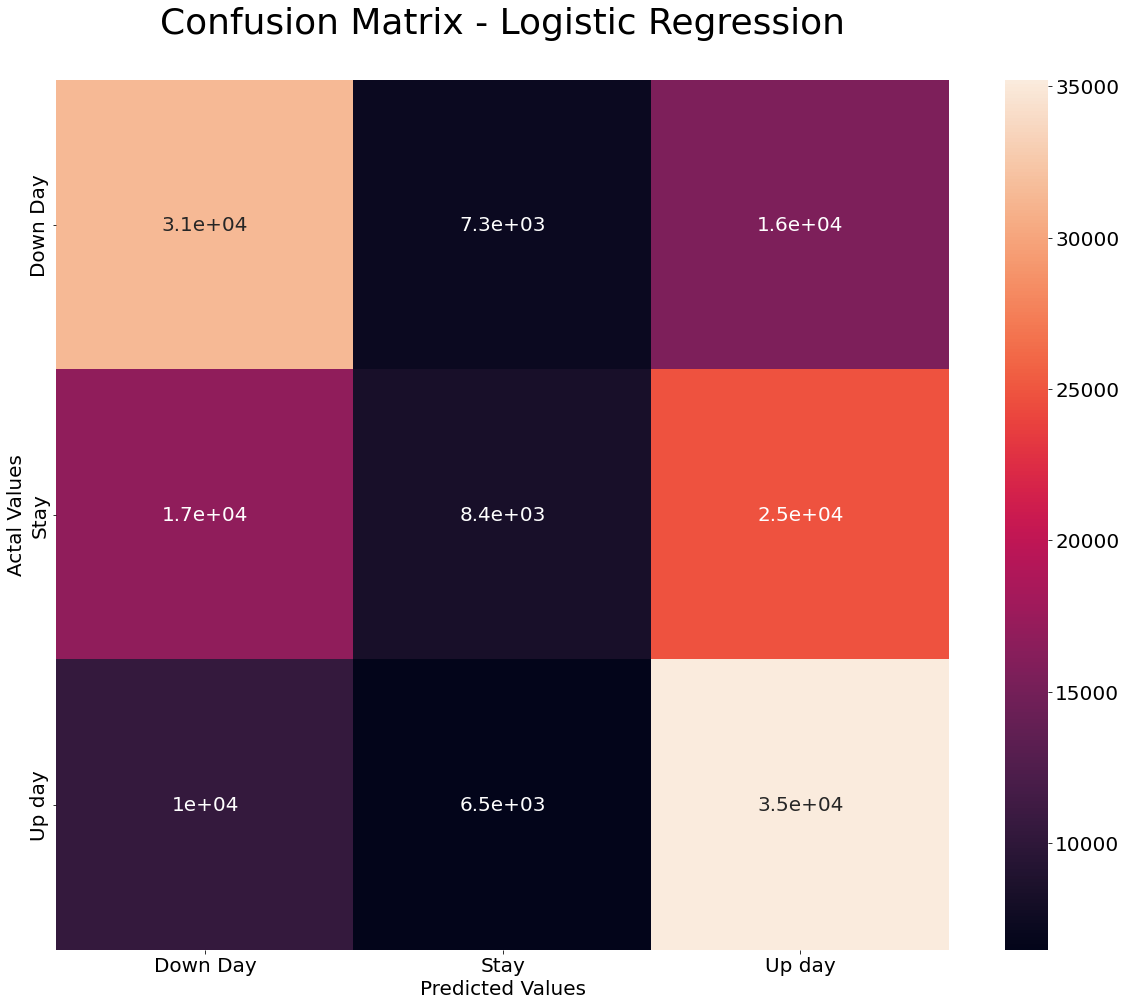

In [ ]:
'''
    Confusion Matrix
'''

log_matrix = confusion_matrix(y_test, y_pred_log)
log_matrix

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
log_matrix_df = pd.DataFrame(log_matrix,
                            index = ['Down Day','Stay','Up day'], 
                            columns = ['Down Day','Stay','Up day'])

#Plotting the confusion matrix
plt.figure(figsize=(20,16))
sns.heatmap(log_matrix_df, annot=True)
plt.rc('font', size=30) 
plt.title('Confusion Matrix - Logistic Regression\n')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
'''
  * AUC(Area Under the ROC Curve)
  
    ROC curve의 밑면적.   
    0~1까지로 1에 가까울수록 좋은 모델   
    https://koreapy.tistory.com/752

'''


n_classes = 3
#y_score_lgbm = lgbm_clf.predict_proba(X_test)

y_prob_log = log_clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_log, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_log, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_log, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_log, multi_class="ovr",
                                     average="weighted")

print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print('---------------------------------------')
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.657365 (macro),
0.658503 (weighted by prevalence)
---------------------------------------
One-vs-Rest ROC AUC scores:
0.658523 (macro),
0.660796 (weighted by prevalence)


In [ ]:
# 학습모델이 예측한 Label

log_predicted_label = pd.DataFrame({'Logistic_Predicted_label':y_pred_log})
log_predicted_label

,Logistic_Predicted_label
0,1
1,1
2,1
3,1
4,1
...,...
156592,1
156593,1
156594,1
156595,1


In [ ]:
y_prob_log = log_clf.predict_proba(X_test)
y_prob_log

array([[0.16929933, 0.23876351, 0.59193716],
       [0.15756167, 0.2296683 , 0.61277003],
       [0.16084794, 0.23768815, 0.6014639 ],
       ...,
       [0.06926118, 0.25520173, 0.67553709],
       [0.06723441, 0.25311675, 0.67964885],
       [0.08004278, 0.27686726, 0.64308996]])

In [ ]:
column_names = ['Logistic_Down Day','Logistic_Stay','Logistic_Up day']

log_pred_prob = pd.DataFrame(y_prob_log, columns=column_names)
log_pred_prob

,Logistic_Down Day,Logistic_Stay,Logistic_Up day
0,0.169299,0.238764,0.591937
1,0.157562,0.229668,0.612770
2,0.160848,0.237688,0.601464
3,0.160338,0.236193,0.603469
4,0.165114,0.237554,0.597332
...,...,...,...
156592,0.072304,0.260318,0.667378
156593,0.074444,0.263540,0.662016
156594,0.069261,0.255202,0.675537
156595,0.067234,0.253117,0.679649


In [ ]:
# Predictied labels과 Prediction probabilities를 합치기

log_pred_prob = pd.merge(log_predicted_label, log_pred_prob, left_index=True, right_index=True)
log_pred_prob

,Logistic_Predicted_label,Logistic_Down Day,Logistic_Stay,Logistic_Up day
0,1,0.169299,0.238764,0.591937
1,1,0.157562,0.229668,0.612770
2,1,0.160848,0.237688,0.601464
3,1,0.160338,0.236193,0.603469
4,1,0.165114,0.237554,0.597332
...,...,...,...,...
156592,1,0.072304,0.260318,0.667378
156593,1,0.074444,0.263540,0.662016
156594,1,0.069261,0.255202,0.675537
156595,1,0.067234,0.253117,0.679649


In [ ]:
# csv 파일 출력

log_pred_prob.to_csv('/content/gdrive/MyDrive/project/log_pred_prob_220607_7.csv')